In [2]:
import torch
import torchvision

In [3]:
from torchvision import transforms as T

In [4]:
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt


In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)

/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /Users/aisaiahpellecer/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100.0%


In [ ]:
model.eval()

In [10]:
img_file = '/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work/images/image_1.jpg'
ig = Image.open(img_file)

In [11]:
transform = T.ToTensor()
img = transform(ig)

In [12]:
with torch.no_grad():
    pred = model([img])

In [ ]:
# pred

In [13]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [14]:
pred[0]['labels']

tensor([ 1, 16,  1, 16,  1, 64,  1,  1,  1,  1, 64, 16, 64, 16,  1, 32, 52,  1,
        18, 88, 10,  1,  1,  1, 64, 64,  1, 52,  1,  1,  1,  1,  6,  1,  1,  1,
        88,  1, 20,  1,  8,  1, 16,  1,  1, 21,  1,  1, 23, 88,  1, 64,  1, 88,
        18,  1,  1,  1,  1,  1,  1,  1, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,
        16, 64,  1,  1,  1,  1,  1, 86,  1, 64,  1,  1,  1,  8, 44, 16, 27, 64,
        64, 27, 20,  1, 64, 18, 18,  1,  1,  1])

In [15]:
pred[0]['scores']

tensor([0.9972, 0.9878, 0.9781, 0.9676, 0.9260, 0.9015, 0.9006, 0.8874, 0.8640,
        0.8050, 0.7679, 0.6878, 0.6627, 0.6049, 0.6047, 0.5989, 0.5934, 0.5888,
        0.5879, 0.5835, 0.5795, 0.5748, 0.5309, 0.5259, 0.5252, 0.5236, 0.5183,
        0.5061, 0.4901, 0.4653, 0.4603, 0.4516, 0.4221, 0.3956, 0.3892, 0.3886,
        0.3868, 0.3853, 0.3712, 0.3583, 0.3403, 0.3329, 0.3311, 0.3287, 0.3258,
        0.3179, 0.3151, 0.3126, 0.3066, 0.3000, 0.2949, 0.2897, 0.2833, 0.2802,
        0.2760, 0.2720, 0.2698, 0.2697, 0.2676, 0.2668, 0.2552, 0.2475, 0.2439,
        0.2429, 0.2343, 0.2319, 0.2207, 0.2191, 0.2171, 0.2022, 0.1985, 0.1950,
        0.1946, 0.1913, 0.1878, 0.1875, 0.1809, 0.1791, 0.1761, 0.1756, 0.1740,
        0.1719, 0.1660, 0.1602, 0.1582, 0.1571, 0.1566, 0.1545, 0.1524, 0.1454,
        0.1452, 0.1417, 0.1402, 0.1343, 0.1337, 0.1322, 0.1293, 0.1283, 0.1281,
        0.1260])

In [16]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [6]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

print(len(coco_names))

91


In [78]:
detected = list(set([coco_names[x - 1] for x in pred[0]['labels']]))
print(detected)


['sheep', 'bus', 'bear', 'person', 'bottle', 'vase', 'backpack', 'tie', 'truck', 'bird', 'potted plant', 'cow', 'traffic light', 'dog', 'banana', 'teddy bear']


In [18]:
threshold = 0.6
# scores >= threshold
torch.argwhere(scores>threshold)
# which basically means that at these positions, the prediction for the objects is greater or equal to the threshold.

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14]])

In [19]:
num = torch.argwhere(scores>threshold).shape[0]
print(num)

15


In [20]:
igg = cv2.imread(img_file)

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [24]:
for i in range(num):
    x1, x2, y1, y2 = bboxes[i].numpy().astype("int")
    # print(x1, x2, y1, y2)
    class_name = coco_names[labels.numpy()[i] - 1]
    # print(class_name)
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 225, 0), 1)
    igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.9, (225,0,0),1,cv2.LINE_AA)

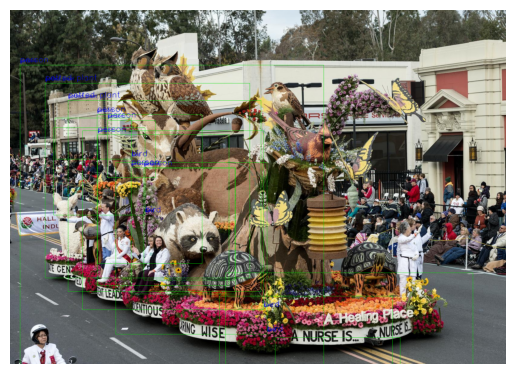

In [25]:
plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [18]:
def object_detection(image_path,threshold=0.95):
    ig = Image.open(image_path)
    #transforms the image into a tensor
    transform = T.ToTensor()
    img = transform(ig)

    #Model Prediction
    with torch.no_grad():
        pred = model([img])

    scores =  pred[0]["scores"]

    #Selects the Predictions with scores greater than or equal to the threshold
    num = torch.argwhere(scores>=threshold).shape[0]

    if num == 0:
        print(f'No objects within the scope of the threshold: {threshold} and COCO dataset detected')
        igg = cv2.imread(image_path)
        plt.figure(figsize=(8, 8), dpi=100) 
        plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    else:
        # create dictionary of prediction labels and bounding boxes
        bboxes, labels = pred[0]["boxes"], pred[0]["labels"]

        igg = cv2.imread(image_path)
        font = cv2.FONT_HERSHEY_SIMPLEX


        # Print the name of Objects detected in the image: 
        detection = list(set(coco_names[labels.numpy()[i] - 1] for i in range(num)))

        print(f'At threshold: {threshold} model detected: {detection}')


        #Labels prediction with bounding box and class name from the COCO dataset
        for i in range(num):
            x1, x2, y1, y2 = bboxes[i].numpy().astype("int")
            # print(x1, x2, y1, y2)
            class_name = coco_names[labels.numpy()[i] - 1]
            val = scores[i].numpy().astype("float").round(2)
            # print(class_name)
            igg = cv2.rectangle(igg, (x1, y1), (x2, y2),(57,255,20), 2)
            igg = cv2.putText(igg, f'{class_name}: {val}', (x1, y1 - 10), font, 1, (57,255,20),2,cv2.LINE_AA)

        #plots the image
        plt.figure(figsize=(8, 8), dpi=100) 
        plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

No objects within the scope of the threshold: 0.95 and COCO dataset detected


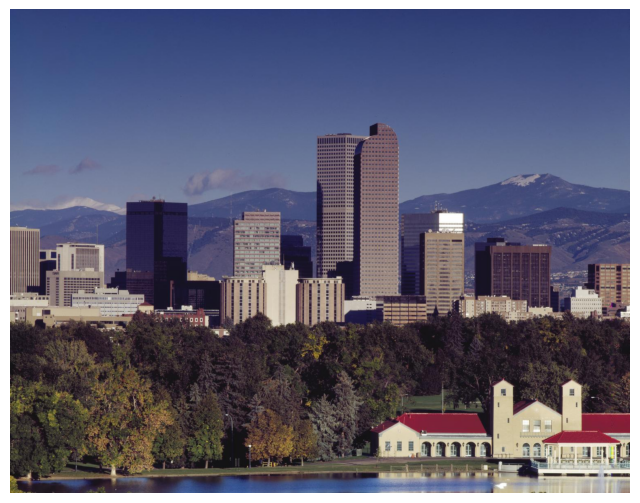

In [19]:
object_detection('images/image_42.jpg')

At threshold: 0.95 model detected: ['person']


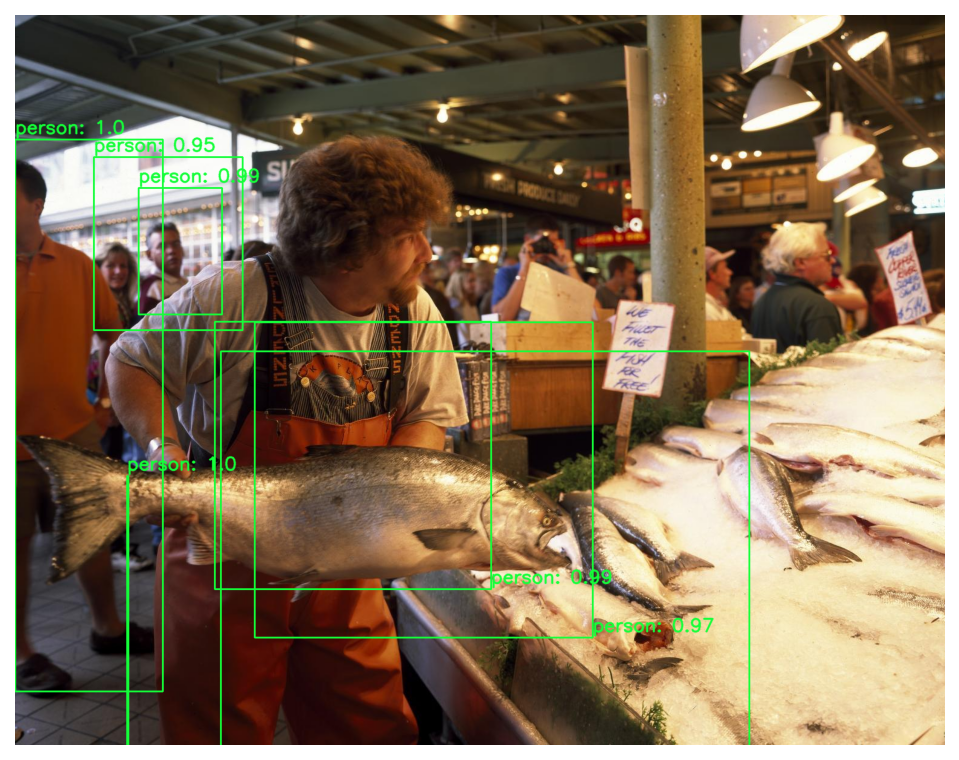

In [15]:
object_detection('images/image_28.jpg')

In [16]:
object_detection('images/image_44.jpg')

No objects within the scope of the threshold: 0.95 and COCO dataset detected


At threshold: 0.95 model detected: ['person', 'car']


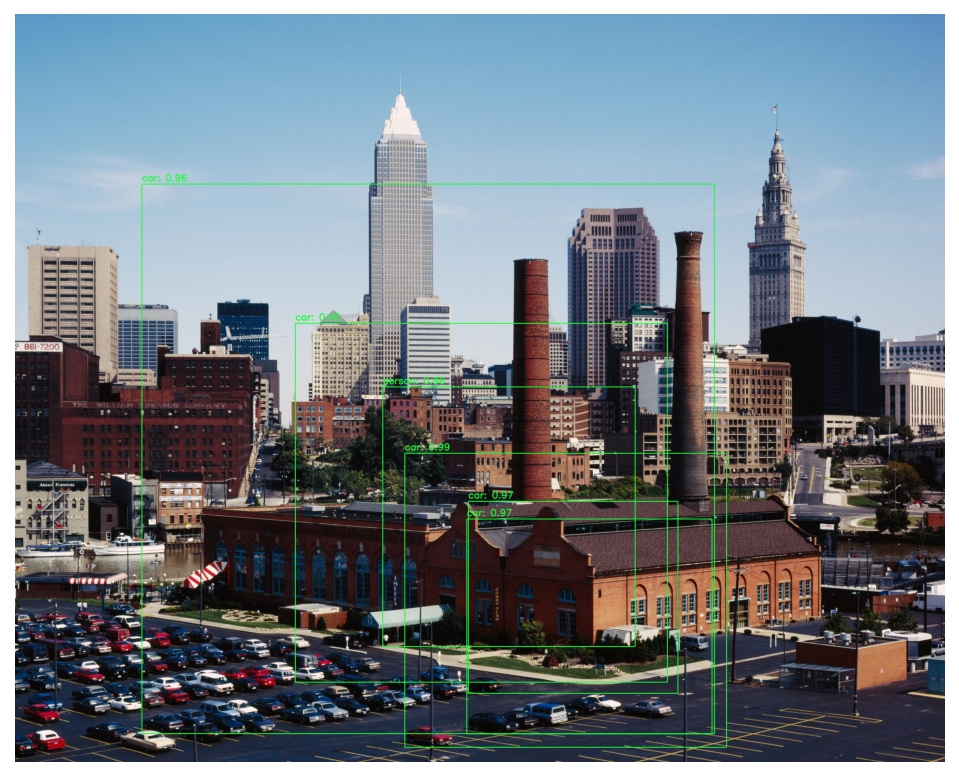

In [16]:
object_detection('images/image_40.jpg')

No objects within the scope of the threshold: 0.95 and COCO dataset detected


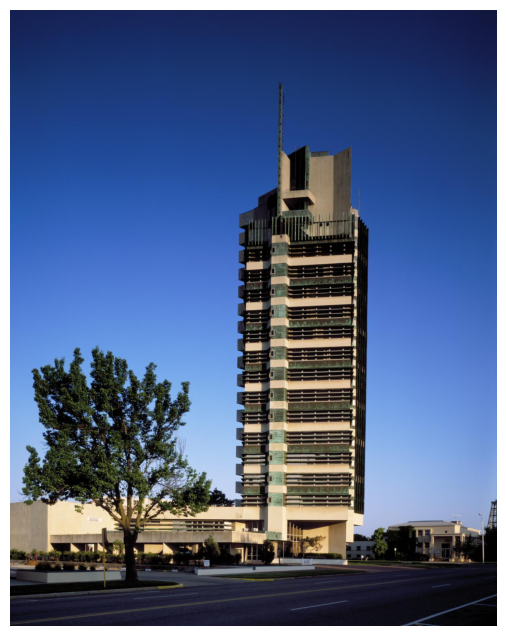

In [20]:
object_detection('images/image_35.jpg')